# Python機器學習與深度學習入門 
## Q 自己寫Gradient Descent
## by R07522717 林温雅

`Package & some display matter`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False

### 我使用的Loss Function是$$\frac{\sin(\frac{x}{3})\cos(\frac{x}{5})\exp(1+|{\frac{x}{20}}|)}{\frac{x}{3}}$$
因有三角函數又有絕對值，得到微分的解析解實屬不易，故在算gradient的地方利用數值方法，算當前x所在位置的y值，與週遭x-0.01~x+0.01中切成20點的y值，用numpy的gradient函數去預估數值解

### 把各種計算包在class Lossfunction裡面

In [2]:
class Lossfunction:

    def __init__(self):
        self.y = None
        self.gradient = None
        self.history_x = None
        self.history_y = None

    def func(self, x):
        y = np.sin(x / 3) / (x / 3) * np.cos(x / 5) * np.exp(1 + np.abs(x / 20))
        return y

    def evaluate_y(self, x):
        self.y = self.func(x)

    def evaluate_history_y(self):
        self.history_y = self.func(self.history_x)

    def gradient_descent(self, x0, learning_rate, iterations):
        self.history_x = np.array([x0])
        for i in range(iterations):
            temp_x = np.linspace(self.history_x[i]-0.01, self.history_x[i]+0.01, 20)
            temp_y = self.func(temp_x)
            grad = np.gradient(temp_y)
            new_x = self.history_x[i] - learning_rate * grad[10]
            self.history_x = np.append(self.history_x, new_x)

令x區間為-50~50，$x_0=3$、learning rate=2, iterations=10000

In [3]:
ls = Lossfunction()
x = np.linspace(-50,50,1000, endpoint=True)
ls.evaluate_y(x)
ls.gradient_descent(3, 2, 10000)
ls.evaluate_history_y()

因運算相當密集，這邊圖示每300點取樣一點做顯示

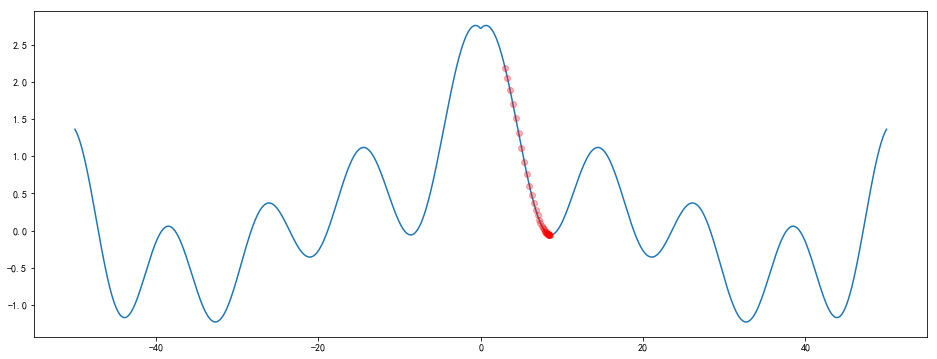

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(x, ls.y)
plt.plot(ls.history_x[::300], ls.history_y[::300], 'ro', alpha=0.3)
plt.show()

### 取不同的起始點運算，並生成gif圖以利觀察動態

In [5]:
L = []
for i in range(3): L.append(Lossfunction())
L[0].evaluate_y(x); L[1].evaluate_y(x); L[2].evaluate_y(x)
L[0].gradient_descent(-28, 2, 10000); L[1].gradient_descent(48, 2, 10000); L[2].gradient_descent(-13, 2, 10000)
L[0].evaluate_history_y(); L[1].evaluate_history_y(); L[2].evaluate_history_y()

In [6]:
%%capture

fig, ax = plt.subplots(figsize=(16, 6))
tempx1, tempy1 = ls.history_x[::200], ls.history_y[::200]
tempx2, tempy2 = L[0].history_x[::200], L[0].history_y[::200]
tempx3, tempy3 = L[1].history_x[::200], L[1].history_y[::200]
tempx4, tempy4 = L[2].history_x[::200], L[2].history_y[::200]

line, ps1, ps2, ps3, ps4 =  ax.plot(x, ls.y, 'b-', [], [], 'ro', [], [], 'yo', [], [], 'go', [], [], 'co',  markersize=15, alpha=0.7)


def init():
    line.set_data(x,ls.y)
    return line,

def animate(i):
    l = len(tempx1)
    ps1.set_data(tempx1[i%l], tempy1[i%l])
    ps2.set_data(tempx2[i%l], tempy2[i%l])
    ps3.set_data(tempx3[i%l], tempy3[i%l])
    ps4.set_data(tempx4[i%l], tempy4[i%l])
    return ps1,ps2,ps3,ps4

mygif = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init,
                                interval=50, blit=False, repeat=True)
mygif.save('gradient_descent.gif', writer='imagemagick', dpi=1200)

<table align="center">
    <tr>
        <td bgcolor=lightcyan style="text-align:center">
            <font size="4">可愛的 GIF !<br></font>
        </td>
    </tr>

</table>

<img src="gradient_descent.gif">